In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures as PF
from pandas.plotting import scatter_matrix as SM
from sklearn.preprocessing import LabelBinarizer as LB

train_x = pd.read_csv('train_x_region.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x_region.csv')

In [496]:
train_x

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia


In [497]:
train_y

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


In [498]:
test_x

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2015,Uruguay,32,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400,3997006,Latin America & Caribbean
1,2017,Brazil,22,6.635,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,216577789,Latin America & Caribbean
2,2019,Poland,40,6.182,1.206000,1.438000,0.884000,0.483000,0.050000,0.117000,48520464,Europe & Central Asia
3,2016,Spain,37,6.361,6.434000,1.342530,1.129450,0.878960,0.375450,0.061370,48608228,Europe & Central Asia
4,2017,Bulgaria,105,4.714,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,9603624,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019,China,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,1584929709,East Asia & Pacific
57,2017,Australia,10,7.284,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,23403215,East Asia & Pacific
58,2018,Iran,106,4.707,1.059000,0.771000,0.691000,0.459000,0.129000,0.282000,78574546,Middle East & North Africa
59,2016,Italy,50,5.977,6.056000,1.354950,1.041670,0.851020,0.188270,0.025560,70112681,Europe & Central Asia


In [499]:
df = pd.concat([train_x, train_y], axis=1)
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0


In [500]:
corr = df.corr()
corr

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
Year,1.000000,-0.000885,-0.004539,-0.249025,0.338014,0.035403,-0.177911,-0.212852,-0.104436,-0.021754,-0.017201
Happiness Rank,-0.000885,1.000000,-0.991314,-0.197356,-0.691598,-0.532426,-0.566554,-0.373608,-0.193258,0.224219,0.126923
Happiness Score,-0.004539,-0.991314,1.000000,0.185357,0.698523,0.513560,0.576130,0.386655,0.222629,-0.217042,-0.134443
Economy (GDP per Capita),-0.249025,-0.197356,0.185357,1.000000,-0.077192,0.608317,0.599059,0.817017,0.007325,-0.025206,-0.030175
Family,0.338014,-0.691598,0.698523,-0.077192,1.000000,0.351260,0.433370,0.029096,0.041434,-0.183352,-0.186854
Health (Life Expectancy),0.035403,-0.532426,0.513560,0.608317,0.351260,1.000000,0.538678,0.667554,0.146313,-0.122050,-0.147452
Freedom,-0.177911,-0.566554,0.576130,0.599059,0.433370,0.538678,1.000000,0.616043,0.135727,0.003389,-0.042866
Trust (Government Corruption),-0.212852,-0.373608,0.386655,0.817017,0.029096,0.667554,0.616043,1.000000,0.274673,-0.035492,-0.058378
Generosity,-0.104436,-0.193258,0.222629,0.007325,0.041434,0.146313,0.135727,0.274673,1.000000,-0.162039,-0.170803
Population Estimate,-0.021754,0.224219,-0.217042,-0.025206,-0.183352,-0.122050,0.003389,-0.035492,-0.162039,1.000000,0.445795


In [501]:
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [502]:
df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07,13090.400826
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08,24587.371903
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05,116.000000
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06,1567.500000
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07,4167.000000
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07,12984.750000
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09,172726.000000


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              242 non-null    int64  
 1   Country                           242 non-null    object 
 2   Happiness Rank                    242 non-null    int64  
 3   Happiness Score                   242 non-null    float64
 4   Economy (GDP per Capita)          242 non-null    float64
 5   Family                            242 non-null    float64
 6   Health (Life Expectancy)          242 non-null    float64
 7   Freedom                           242 non-null    float64
 8   Trust (Government Corruption)     242 non-null    float64
 9   Generosity                        242 non-null    float64
 10  Population Estimate               242 non-null    int64  
 11  Region                            242 non-null    object 
 12  Immigrat

In [504]:
df['happiness_score_with_families'] = df['Happiness Score'] / df['Family']

In [505]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [506]:
df['trust_and_population'] = df['Trust (Government Corruption)'] / df['Population Estimate']

In [507]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

In [508]:
df['population_and_trust'] = df['Population Estimate'] / df['Trust (Government Corruption)'] 
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States,happiness_score_with_families,trust_and_population,population_and_trust
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0,4.644127,6.269779e-09,1.594952e+08
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0,3.271613,1.782385e-09,5.610460e+08
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0,4.973629,1.996714e-08,5.008228e+07
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0,4.779983,6.221608e-09,1.607301e+08
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0,8.635997,7.770632e-08,1.286897e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0,6.330891,5.865827e-09,1.704790e+08
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0,5.017446,1.109352e-09,9.014269e+08
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0,13.147273,5.187353e-09,1.927766e+08
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0,5.248366,6.743771e-11,1.482850e+10


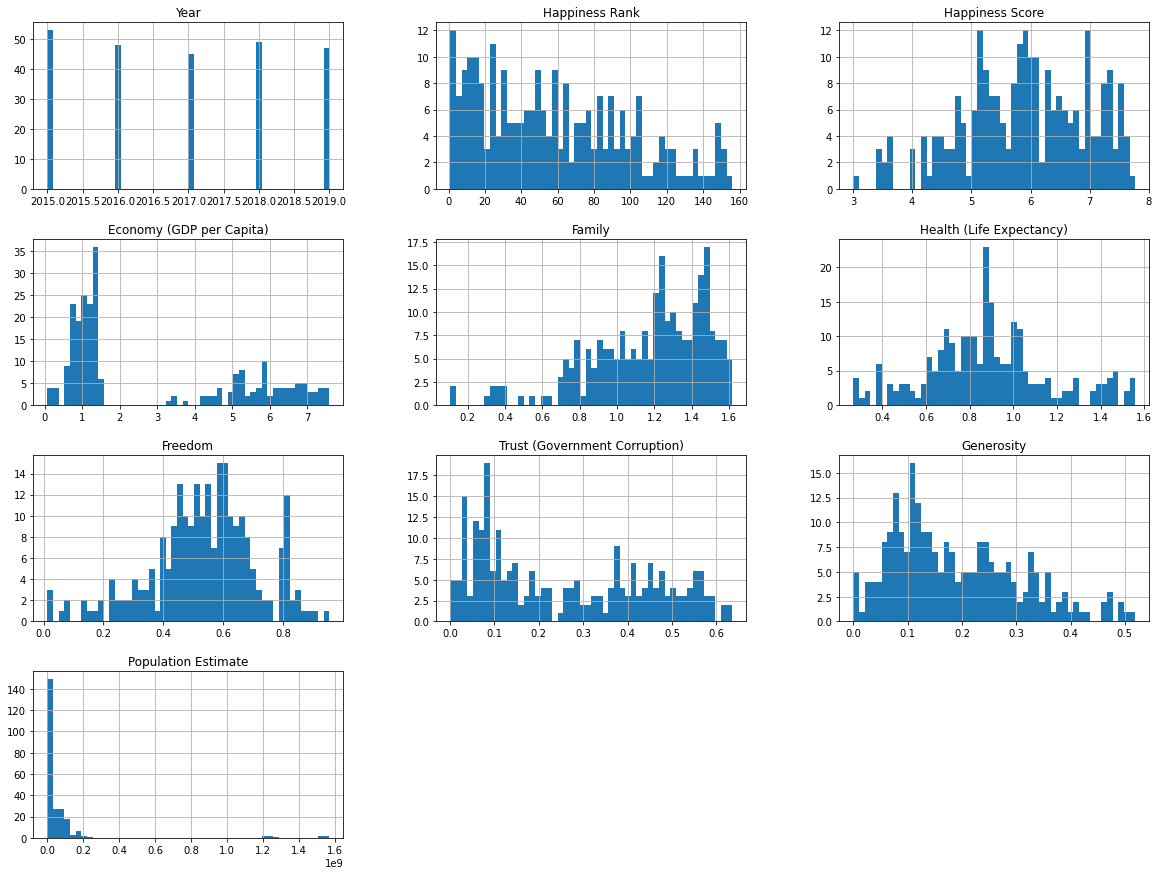

In [509]:
train_x.hist(bins=50, figsize=(20,15))
plt.show()

In [510]:
df['trust_and_happiness'] = df['Trust (Government Corruption)'] / df['Happiness Score']

In [511]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_happiness                 0.000290
Name: Immigration to the United States, dtype: float64

array([[<AxesSubplot:xlabel='Immigration to the United States', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Family', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Happiness Rank', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Year', ylabel='Immigration to t

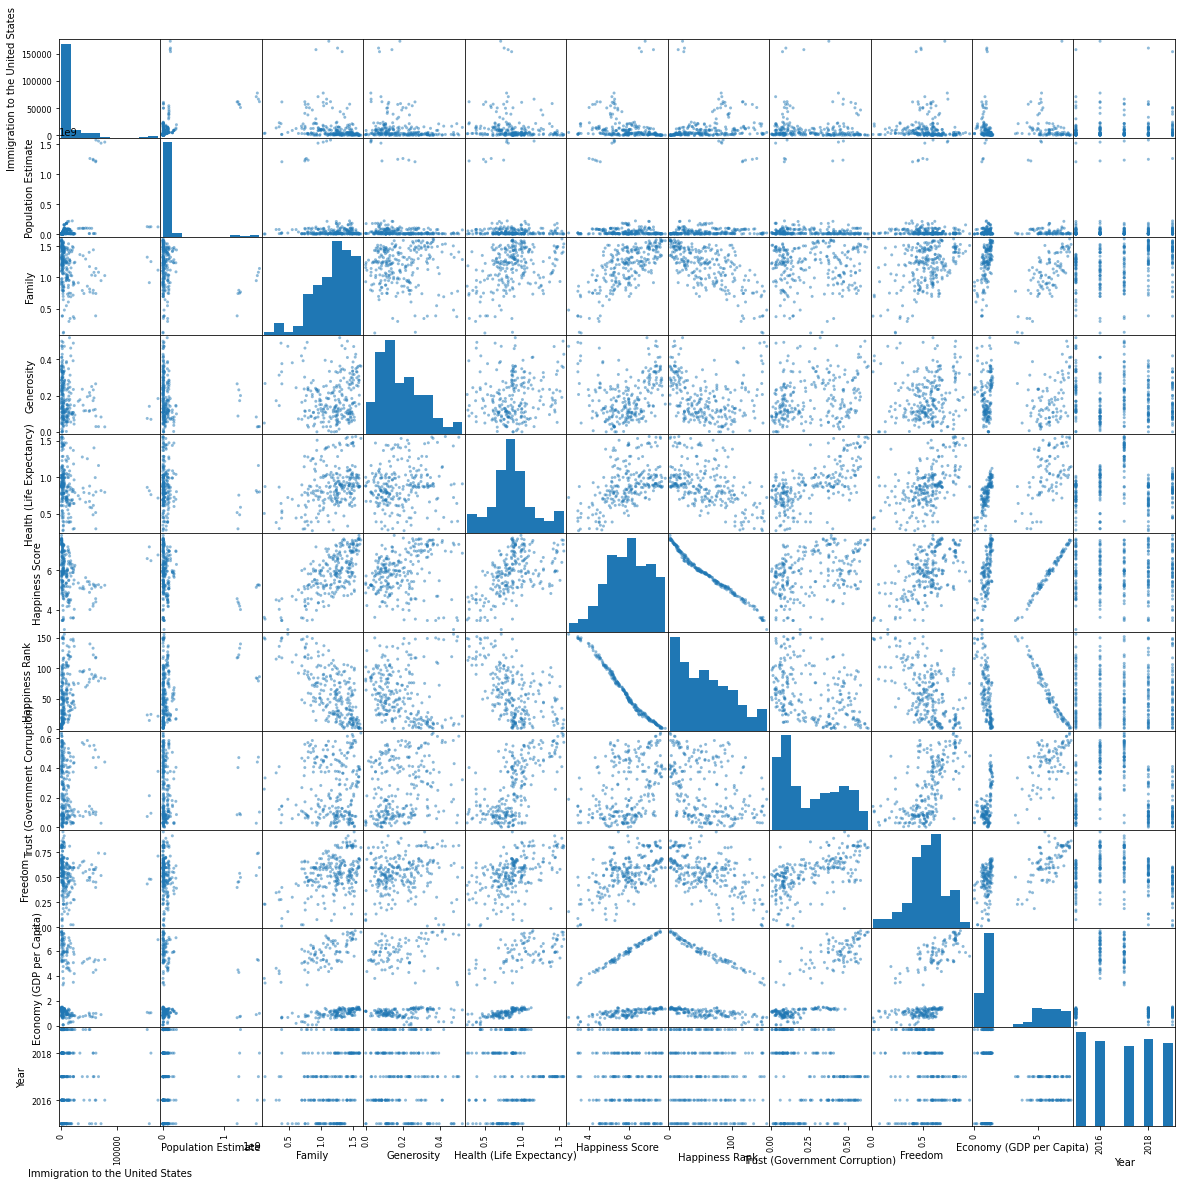

In [512]:
attributes = ['Immigration to the United States', 'Population Estimate', 'Family', 'Generosity',
              'Health (Life Expectancy)', 'Happiness Score', 'Happiness Rank', 'Trust (Government Corruption)',
              'Freedom', 'Economy (GDP per Capita)', 'Year']

SM(df[attributes], figsize=(20,20))

In [513]:
df['population_vs_gdp'] = df['Population Estimate'] / df['Economy (GDP per Capita)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_happiness                 0.000290
Name: Immigration to the United States, dtype: float64

In [514]:
df['trust_vs_freedom'] = df['Trust (Government Corruption)'] / df['Freedom']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_happiness                 0.000290
Name: Immigration to the United States, dtype: float64

In [515]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_happiness                 0.000290
Name: Immigration to the United States, dtype: float64

In [516]:
df.Region.value_counts()

Latin America & Caribbean     87
Europe & Central Asia         81
East Asia & Pacific           31
Middle East & North Africa    25
Sub-Saharan Africa            13
South Asia                     5
Name: Region, dtype: int64

In [517]:
enc = LB()
enc.fit(df.Region)
transformed_op = enc.transform(df.Region)
transformed_op

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [518]:
one_hot_df = pd.DataFrame(transformed_op)
df = pd.concat([df, one_hot_df], axis=1)
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,population_and_trust,trust_and_happiness,population_vs_gdp,trust_vs_freedom,0,1,2,3,4,5
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,1.594952e+08,0.071877,1.132248e+07,0.555666,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,5.610460e+08,0.010820,2.929156e+07,0.390977,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,5.008228e+07,0.012976,4.504499e+06,0.166667,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,1.607301e+08,0.011075,1.325609e+07,0.125245,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,1.286897e+07,0.077740,9.815985e+05,0.714305,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,1.704790e+08,0.107774,1.877198e+07,1.250435,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,9.014269e+08,0.011405,5.941882e+07,0.176724,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,1.927766e+08,0.091669,1.800558e+07,1.156852,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,1.482850e+10,0.021171,1.669434e+09,0.170683,0,0,0,0,1,0


In [519]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
1                                  -0.278405
4                                   0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
2                                   0.169817
0                                   0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
3                                  -0.083913
5                                  -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_

In [520]:
df.iloc[239,:]

Year                                              2017
Country                                       Ethiopia
Happiness Rank                                     119
Happiness Score                                   4.46
Economy (GDP per Capita)                      4.377271
Family                                        0.339234
Health (Life Expectancy)                      0.864669
Freedom                                        0.35341
Trust (Government Corruption)                 0.408843
Generosity                                    0.312651
Population Estimate                           78815294
Region                              Sub-Saharan Africa
Immigration to the United States               15678.0
happiness_score_with_families                13.147273
trust_and_population                               0.0
population_and_trust                  192776551.514723
trust_and_happiness                           0.091669
population_vs_gdp                      18005576.260671
trust_vs_f

In [521]:
df.Region.value_counts()

Latin America & Caribbean     87
Europe & Central Asia         81
East Asia & Pacific           31
Middle East & North Africa    25
Sub-Saharan Africa            13
South Asia                     5
Name: Region, dtype: int64

In [522]:
df[df.Region=='East Asia & Pacific']

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,population_and_trust,trust_and_happiness,population_vs_gdp,trust_vs_freedom,0,1,2,3,4,5
9,2019,Hong Kong,76,5.430,1.438000,1.277000,1.122000,0.440000,0.287000,0.258000,...,2.919426e+07,0.052855,5.826672e+06,0.652273,1,0,0,0,0,0
13,2016,China,83,5.245,5.291000,1.027800,0.793810,0.735610,0.440120,0.027450,...,3.484861e+09,0.083912,2.898804e+08,0.598306,1,0,0,0,0,0
42,2018,Japan,54,5.915,1.294000,1.462000,0.988000,0.553000,0.150000,0.079000,...,1.044622e+09,0.025359,1.210922e+08,0.271248,1,0,0,0,0,0
57,2016,Hong Kong,75,5.458,5.554000,1.510700,0.870210,0.952770,0.480790,0.316470,...,1.686439e+07,0.088089,1.459890e+06,0.504623,1,0,0,0,0,0
73,2017,China,79,5.273,5.226721,1.081166,1.160837,0.741416,0.472788,0.028807,...,3.280405e+09,0.089662,2.967319e+08,0.637683,1,0,0,0,0,0
84,2015,China,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,...,5.452964e+10,0.005411,1.703668e+09,0.053794,1,0,0,0,0,0
87,2018,Australia,10,7.272,1.340000,1.573000,0.910000,0.647000,0.302000,0.361000,...,7.834652e+07,0.041529,1.765720e+07,0.466770,1,0,0,0,0,0
89,2019,Philippines,69,5.631,0.807000,1.293000,0.657000,0.558000,0.107000,0.117000,...,9.528370e+08,0.019002,1.263365e+08,0.191756,1,0,0,0,0,0
91,2019,Australia,11,7.228,1.372000,1.548000,1.036000,0.557000,0.290000,0.332000,...,8.246960e+07,0.040122,1.743162e+07,0.520646,1,0,0,0,0,0
93,2015,Philippines,90,5.073,0.705320,1.035160,0.581140,0.625450,0.122790,0.249910,...,7.944434e+08,0.024205,1.383056e+08,0.196323,1,0,0,0,0,0


In [523]:
df = df.rename(columns={0: 'east_asia_and_pacific', 1: 'europe_and_central_asia', 2: 'latin_america_and_caribbean',
                       3: 'middle_east_and_north_africa', 4: 'south_asia', 5: 'sub_saharan_africa'})
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,population_and_trust,trust_and_happiness,population_vs_gdp,trust_vs_freedom,east_asia_and_pacific,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,1.594952e+08,0.071877,1.132248e+07,0.555666,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,5.610460e+08,0.010820,2.929156e+07,0.390977,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,5.008228e+07,0.012976,4.504499e+06,0.166667,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,1.607301e+08,0.011075,1.325609e+07,0.125245,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,1.286897e+07,0.077740,9.815985e+05,0.714305,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,1.704790e+08,0.107774,1.877198e+07,1.250435,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,9.014269e+08,0.011405,5.941882e+07,0.176724,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,1.927766e+08,0.091669,1.800558e+07,1.156852,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,1.482850e+10,0.021171,1.669434e+09,0.170683,0,0,0,0,1,0


In [524]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
trust_and_

In [525]:
df['eaca_vs_happiness'] = df['europe_and_central_asia'] / df['Happiness Score']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (GDP per Capita)           -0.030175
Year      

In [526]:
df['pop_vs_health'] = df['Population Estimate'] / df['Health (Life Expectancy)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_freedom                   -0.032066
Economy (G

In [527]:
df['pop_vs_year'] = df['Population Estimate'] / df['Year']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_f

In [528]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_score_with_families       0.035850
trust_vs_f

In [529]:
df['pop_vs_happiness'] = df['Population Estimate'] / df['Happiness Score']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
happiness_

In [530]:
df['happiness_vs_health'] = df['Happiness Score'] / df['Health (Life Expectancy)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom   

In [531]:
df['health_vs_happiness'] =  df['Health (Life Expectancy)'] / df['Happiness Score']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_saharan_africa                 -0.061984
Trust (Gov

In [532]:
# df.drop(columns=['happiness_vs_health', 'health_vs_happiness'], inplace=True)
df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,eaca_vs_happiness,pop_vs_health,pop_vs_year,pop_vs_happiness,happiness_vs_health,health_vs_happiness
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,0,0,0,0,0.154369,7.388882e+07,36837.388889,1.146406e+07,6.445258,0.155153
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,1,0,0,0,0.000000,4.440547e+07,14457.082755,6.070411e+06,7.315068,0.136704
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,1,0,0,0,0.000000,4.836606e+06,2306.910352,6.498747e+05,7.442368,0.134366
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,1,0,0,0,0.000000,1.457044e+07,5094.962358,1.780019e+06,8.185552,0.122166
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,1,0,0,0,0.000000,6.696330e+06,2973.522817,1.000438e+06,6.693402,0.149401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,0,0,0,0,0.000000,7.956407e+07,49462.958850,1.837326e+07,4.330428,0.230924
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,0,0,0,0,0.139082,8.323987e+07,36628.844400,1.028053e+07,8.096847,0.123505
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,0,0,0,1,0.000000,9.115081e+07,39075.505206,1.767159e+07,5.158042,0.193872
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,0,0,1,0,0.000000,2.143575e+09,624280.500743,3.139284e+08,6.828231,0.146451


In [533]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_saharan_africa                 -0.061984
Trust (Gov

In [534]:
df['happiness_vs_gdp'] =  df['Year'] / df['Economy (GDP per Capita)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_saharan_africa                 -0.061984
Trust (Gov

In [535]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_saharan_africa                 -0.061984
Trust (Gov

In [536]:
df['pop_vs_family'] =  df['Population Estimate'] / df['Family']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_sahara

In [537]:
df['eaca_and_family'] =  df['europe_and_central_asia'] / df['Family']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_and_family                    -0.273888
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_

In [538]:
df.drop(columns=['eaca_and_family'], axis=1, inplace=True)

In [539]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_sahara

In [540]:
# df['eaca_and_family'] =  df['europe_and_central_asia'] * df['Family']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_happiness                -0.073961
sub_sahara

In [541]:
df['family_vs_health'] =  df['pop_vs_family'] * df['pop_vs_health']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_

In [542]:
df['population_vs_gdp'] =  df['Population Estimate'] / df['Economy (GDP per Capita)']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_vs_health                 0.078384
health_vs_

In [543]:
df['fam_vs_generosity'] =  df['Family'] - df['Generosity']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
fam_vs_generosity                  -0.115429
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_

In [544]:
# df['freedom_vs_happiness'] =  df['Freedom'] - df['Happiness Score']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
fam_vs_generosity                  -0.115429
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_

In [545]:
# df['gdp_vs_happiness'] =  df['Happiness Score'] / df['Economy (GDP per Capita)'] 

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
fam_vs_generosity                  -0.115429
trust_and_population               -0.100567
middle_east_and_north_africa       -0.083913
happiness_

In [546]:
df['mena_vs_population'] = df['Population Estimate'] / df['middle_east_and_north_africa']

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
mena_vs_population                  0.506257
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
eaca_vs_happiness                  -0.271583
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
fam_vs_generosity                  -0.115429
trust_and_population               -0.100567
middle_eas

In [547]:
df = df.rename(columns={'mena_vs_population': 'population_vs_mena'})


In [548]:
df.drop(columns=['population_vs_mena', 'trust_and_happiness', 'happiness_vs_gdp', 'trust_vs_freedom',
                 'happiness_score_with_families', 'health_vs_happiness', 'happiness_vs_health',
                 'trust_and_population', 'fam_vs_generosity', 'eaca_vs_happiness'], axis=1, inplace=True)

corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (G

In [549]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)

In [550]:
print(len(train_set), 'train instances and', len(test_set), 'test instances.')

194 train instances and 48 test instances.


In [551]:
train_labels = train_set['Immigration to the United States']
test_labels = test_set['Immigration to the United States']

In [552]:
train_features = train_set.drop(columns=['Immigration to the United States', 'Country', 'Region'])
test_features = test_set.drop(columns=['Immigration to the United States', 'Country', 'Region'])

In [553]:
reg = LR()

reg.fit(train_features, train_labels)

LinearRegression()

In [554]:
df.Country.value_counts()

Vietnam        5
Jamaica        5
Bolivia        5
Portugal       5
El Salvador    5
              ..
Uruguay        3
Belgium        3
Turkey         3
Suriname       2
Hungary        2
Name: Country, Length: 62, dtype: int64

In [555]:
test_df = df.copy()

In [556]:
test_df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,pop_vs_health,pop_vs_year,pop_vs_happiness,pop_vs_family,family_vs_health
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,1,0,0,0,0,7.388882e+07,36837.388889,1.146406e+07,5.324055e+07,3.933881e+15
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,0,1,0,0,0,4.440547e+07,14457.082755,6.070411e+06,1.986004e+07,8.818942e+14
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,0,1,0,0,0,4.836606e+06,2306.910352,6.498747e+05,3.232236e+06,1.563305e+13
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,0,1,0,0,0,1.457044e+07,5094.962358,1.780019e+06,8.508461e+06,1.239720e+14
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,0,1,0,0,0,6.696330e+06,2973.522817,1.000438e+06,8.639776e+06,5.785479e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,0,0,0,0,0,7.956407e+07,49462.958850,1.837326e+07,1.163191e+08,9.254820e+15
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,1,0,0,0,0,8.323987e+07,36628.844400,1.028053e+07,5.158200e+07,4.293679e+15
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,0,0,0,0,1,9.115081e+07,39075.505206,1.767159e+07,2.323332e+08,2.117736e+16
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,0,0,0,1,0,2.143575e+09,624280.500743,3.139284e+08,1.647611e+09,3.531778e+18


In [557]:
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,europe_and_central_asia,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,pop_vs_health,pop_vs_year,pop_vs_happiness,pop_vs_family,family_vs_health
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,...,1,0,0,0,0,7.388882e+07,36837.388889,1.146406e+07,5.324055e+07,3.933881e+15
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,...,0,1,0,0,0,4.440547e+07,14457.082755,6.070411e+06,1.986004e+07,8.818942e+14
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,...,0,1,0,0,0,4.836606e+06,2306.910352,6.498747e+05,3.232236e+06,1.563305e+13
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,...,0,1,0,0,0,1.457044e+07,5094.962358,1.780019e+06,8.508461e+06,1.239720e+14
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,...,0,1,0,0,0,6.696330e+06,2973.522817,1.000438e+06,8.639776e+06,5.785479e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,...,0,0,0,0,0,7.956407e+07,49462.958850,1.837326e+07,1.163191e+08,9.254820e+15
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,...,1,0,0,0,0,8.323987e+07,36628.844400,1.028053e+07,5.158200e+07,4.293679e+15
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,...,0,0,0,0,1,9.115081e+07,39075.505206,1.767159e+07,2.323332e+08,2.117736e+16
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,...,0,0,0,1,0,2.143575e+09,624280.500743,3.139284e+08,1.647611e+09,3.531778e+18


In [558]:
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (G

In [559]:
train_set1, test_set1 = split_train_test(test_df, 0.2)

train_labels1 = train_set1['Immigration to the United States']
test_labels1 = test_set1['Immigration to the United States']

train_features1 = train_set1.drop(columns=['Immigration to the United States', 'Country', 'Region'])
test_features1 = test_set1.drop(columns=['Immigration to the United States', 'Country', 'Region'])

reg = LR()
reg.fit(train_features1, train_labels1)

LinearRegression()

In [560]:
hyp = reg.predict(test_features1)
hyp

array([22916.37569187,  7563.46260549, 42323.98398357,  6330.8471854 ,
       11925.09530117,  5924.22717924,  5077.25228271, 23446.17100313,
        7558.4865711 , 26038.84268189,  5048.61954882,  6381.79553719,
        6566.61801236,  7585.63563865,  5798.21729015,  7465.00152152,
        9336.46014295, 21644.68733557, 21052.63739057, 23844.73156265,
       11029.09318874,  5986.50203545,  6288.57870497, 13792.96517009,
       10366.19811608,  7249.28054642, 15446.02317991, 17855.45936835,
        8602.67834245, 19448.17459964,  5061.47354699,  9172.75455532,
        6780.62528369, 16923.70435305,  9049.13435136,  8754.62576443,
        5835.750318  , 11723.6202106 ,  5415.13303626,  6312.94082099,
        6188.05456712,  9109.28248453, 12928.28434902, 20081.67341784,
        6649.22363552,  6005.14816256, 13737.72522207, 16840.3658512 ])

In [561]:
np.sqrt(MSE(test_labels1, hyp))

10925.151540352128

In [562]:
# SM(test_df[test_df.columns], figsize=(20,20))
test_df.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Population Estimate', 'Region', 'Immigration to the United States',
       'population_and_trust', 'population_vs_gdp', 'east_asia_and_pacific',
       'europe_and_central_asia', 'latin_america_and_caribbean',
       'middle_east_and_north_africa', 'south_asia', 'sub_saharan_africa',
       'pop_vs_health', 'pop_vs_year', 'pop_vs_happiness', 'pop_vs_family',
       'family_vs_health'],
      dtype='object')

In [563]:
test_df['year_vs_gdp'] = (test_df['Year'] / df['Economy (GDP per Capita)'])

test_corr = test_df.corr()
test_corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
pop_vs_year                         0.445815
Population Estimate                 0.445795
pop_vs_happiness                    0.431914
pop_vs_family                       0.413199
pop_vs_health                       0.406748
family_vs_health                    0.355677
population_vs_gdp                   0.354033
europe_and_central_asia            -0.278405
south_asia                          0.263632
population_and_trust                0.246389
Family                             -0.186854
Generosity                         -0.170803
latin_america_and_caribbean         0.169817
east_asia_and_pacific               0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
middle_east_and_north_africa       -0.083913
sub_saharan_africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (G

array([[<AxesSubplot:xlabel='Immigration to the United States', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='pop_vs_year', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='pop_vs_happiness', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='pop_vs_family', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='pop_vs_health', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='family_vs_health', ylabel='Immigration to the United States'>,
        <AxesSubplot:xlabel='population_vs_gdp', ylabel='Immigration to the United States'>],
       [<AxesSubplot:xlabel='Immigration to the United States', ylabel='pop_vs_year'>,
        <AxesSubplot:xlabel='pop_vs_year', ylabel='pop_vs_year'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='pop_vs_year'>,
        <AxesSubplot:xlabel

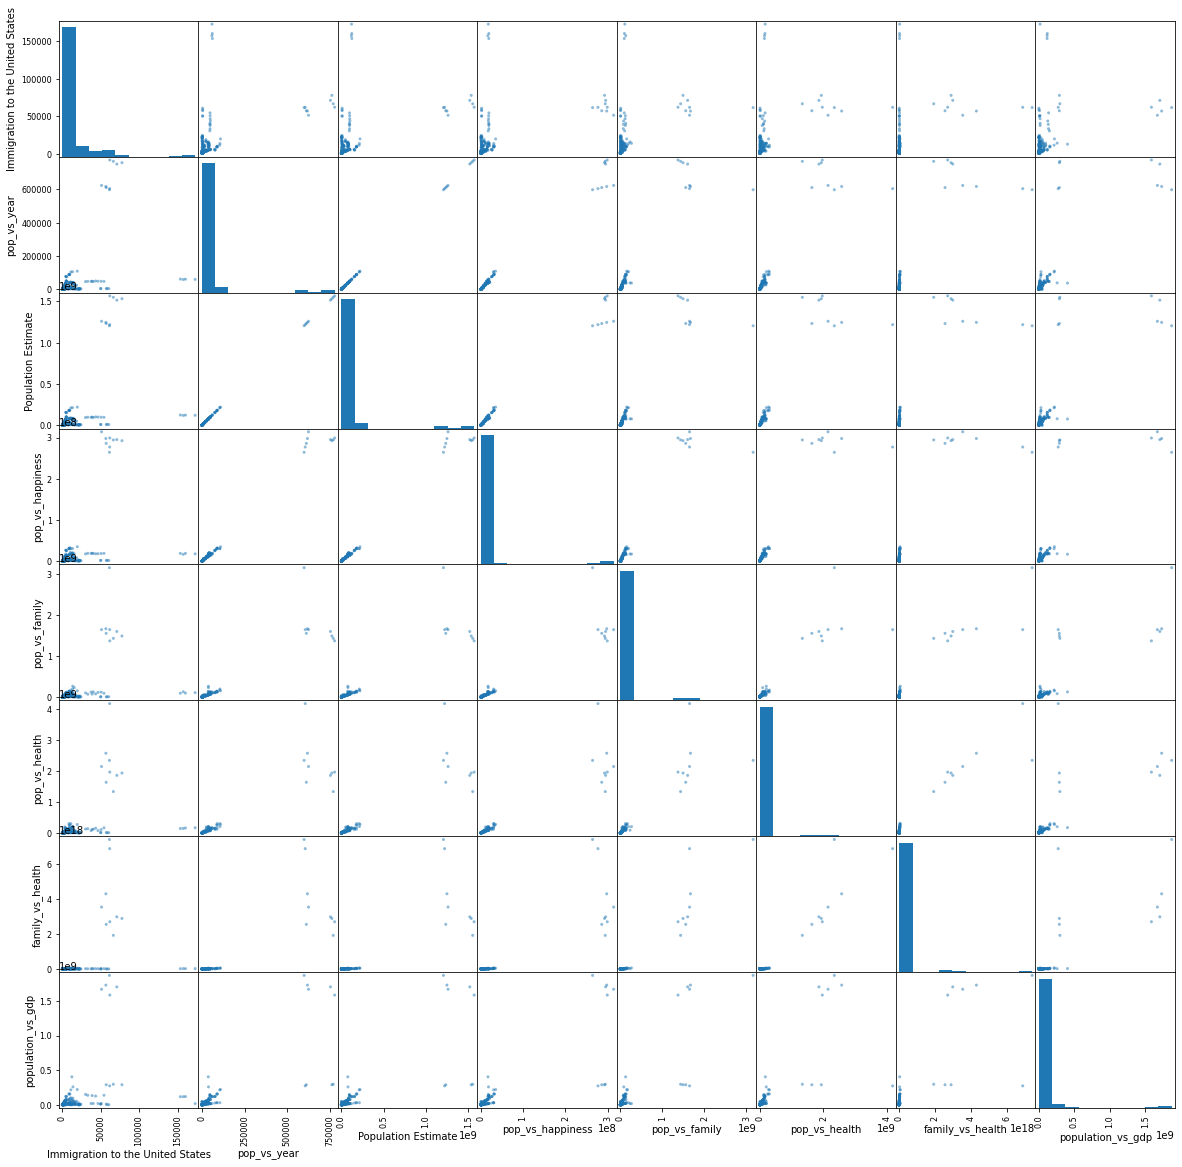

In [564]:
attributes = ['Immigration to the United States', 'pop_vs_year', 'Population Estimate', 'pop_vs_happiness',
              'pop_vs_family', 'pop_vs_health', 'family_vs_health',
              'population_vs_gdp']

SM(test_df[attributes], figsize=(20,20))

## Finally, you clearly want to create a new region-based feature -- population_vs_sa, etc. I think it will work out REALLY well and will likely lower the model's MSE. Although it's constructed from many sources, I encourage you to consider creating one column with the appropriate region / regional data. You can add it external to pandas (eg. a python class) as long as you can include it in your notebook.

In [565]:
test_df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,latin_america_and_caribbean,middle_east_and_north_africa,south_asia,sub_saharan_africa,pop_vs_health,pop_vs_year,pop_vs_happiness,pop_vs_family,family_vs_health,year_vs_gdp
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,...,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000,2.420000e+02,2.420000e+02,2.420000e+02,242.000000
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07,...,0.359504,0.103306,0.020661,0.053719,1.288987e+08,43505.605064,1.724896e+07,9.826696e+07,1.489544e+17,1799.383137
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08,...,0.480850,0.304989,0.142542,0.225930,4.414927e+08,128165.451959,5.453985e+07,3.394253e+08,8.198577e+17,3153.130721
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05,...,0.000000,0.000000,0.000000,0.000000,2.815498e+05,149.355655,5.055423e+04,2.795840e+05,9.441261e+10,265.612648
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06,...,0.000000,0.000000,0.000000,0.000000,7.990879e+06,3646.436476,1.203392e+06,6.192374e+06,4.933172e+13,374.982730
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07,...,0.000000,0.000000,0.000000,0.000000,1.851523e+07,6786.029631,2.570074e+06,1.491126e+07,2.485510e+14,1518.807344
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07,...,1.000000,0.000000,0.000000,0.000000,7.780983e+07,36301.454188,1.165171e+07,5.318232e+07,4.321125e+15,2052.579632
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09,...,1.000000,1.000000,1.000000,1.000000,4.170435e+09,777004.638256,3.139284e+08,3.159163e+09,7.393669e+18,28300.561798
